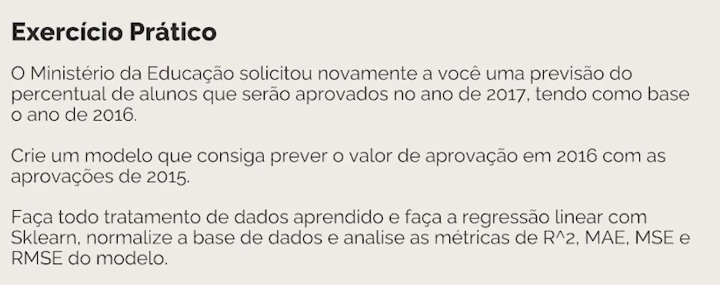

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Base
df = pd.read_excel(r"rls_sklearn_base-aplicacao.xlsx")
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [3]:
# Estatística dos dados
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [4]:
# Correlação
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [5]:
# Análise do tipo dos dados e se tem nulo na base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<AxesSubplot:xlabel='ano_2015', ylabel='Count'>

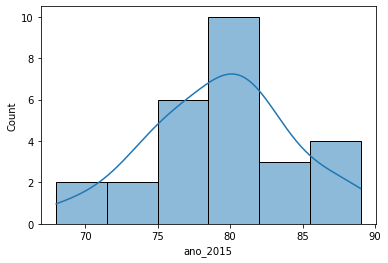

In [6]:
# Histograma da distribuição dos dados do ano_2015 para verificar o comportamento da variável
sns.histplot(data=df, x="ano_2015", kde=True)

<AxesSubplot:xlabel='ano_2016', ylabel='Count'>

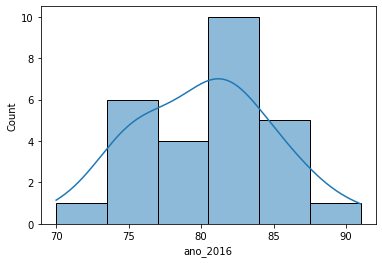

In [8]:
# Histograma da distribuição dos dados de preço para verificar o comportamento da variável
sns.histplot(data=df, x="ano_2016", kde=True)

<AxesSubplot:xlabel='ano_2015', ylabel='ano_2016'>

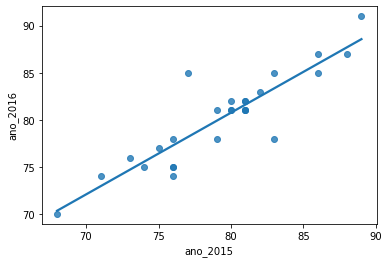

In [10]:
# Gráfico para verificar a regressão linear
sns.regplot(x = "ano_2015", 
            y = "ano_2016",  
            ci = None, 
            data = df) 

In [11]:
# Normalização dos dados para ficarem com mesma escala de grandeza.
# nesse caso a aplicação é apenas para fins didáticos, pois os dados estão na mesma escala

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [12]:
# Dataframe normalizado
df_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [13]:
# Descrição estatística do Dataframe normalizado
df_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


<AxesSubplot:xlabel='ano_2015', ylabel='Count'>

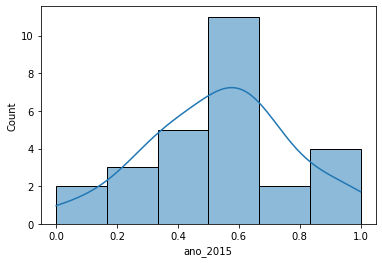

In [14]:
sns.histplot(data=df_norm, x="ano_2015", kde=True)

<AxesSubplot:xlabel='ano_2016', ylabel='Count'>

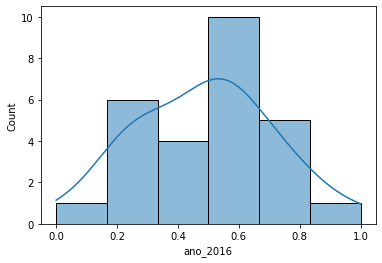

In [16]:
sns.histplot(data=df_norm, x="ano_2016", kde=True)

<AxesSubplot:xlabel='ano_2015', ylabel='ano_2016'>

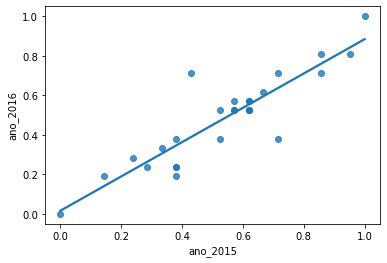

In [17]:
# Grafico de regressão da base normalizada
sns.regplot(x = "ano_2015", 
            y = "ano_2016",  
            ci = None, 
            data = df_norm) 

In [32]:
x = df[["ano_2015"]]

y = df[["ano_2016"]]

In [33]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
# Verificando R²
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.7996800852883922


In [35]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 1.4924660549216124
MSE: 5.096620729353601
RMSE: 2.2575696510525654


In [36]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2922295962708386
MSE: 2.329838613597714
RMSE: 1.5263808874582103
